In [ ]:
# prompt: convert pandas dataframe to numpy arrays

import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
arr = df.to_numpy()
print(arr)


In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
X.shape

(70000, 784)

In [ ]:
X.max().max()

255.0

In [ ]:
X.min().min()

0.0

In [ ]:
ind_2022 = X.iloc[2022]

In [ ]:
y.iloc[2022]

'2'

In [ ]:
ind_2022.mean()

27.761479591836736

In [ ]:
ind_2022[ind_2022 == 0].count()

643

In [2]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:12000], y[:10000], y[10000:12000]

In [ ]:
y_train.unique().shape

(10,)

In [ ]:
y_train.value_counts()

class
1    1127
7    1070
3    1032
6    1014
0    1001
2     991
4     980
9     978
8     944
5     863
Name: count, dtype: int64

In [ ]:
y_test.unique().shape

(10,)

In [ ]:
y_test.value_counts()

class
1    224
9    215
7    209
0    205
4    204
3    196
6    194
2    185
5    185
8    183
Name: count, dtype: int64

In [7]:
y_train[y_train=='6']

(1014,)

In [3]:
# prompt: get the indexes of samples from y_train with value 6

label_6_ind = y_train[y_train=='6'].index
label_9_ind = y_train[y_train=='9'].index


In [4]:
X_train_6, y_train_6 = X_train.iloc[label_6_ind], y_train.iloc[label_6_ind]
X_train_9, y_train_9 = X_train.iloc[label_9_ind], y_train.iloc[label_9_ind]

In [5]:
import pandas as pd
X_train_6_9 = pd.concat([X_train_6, X_train_9])
y_train_6_9 = pd.concat([y_train_6, y_train_9])

In [13]:
y_train_6_9.value_counts()

class
6    1014
9     978
0       0
1       0
2       0
3       0
4       0
5       0
7       0
8       0
Name: count, dtype: int64

In [6]:
y_train_6_9_pos_neg = y_train_6_9.replace({'6': 1, '9': -1})

In [7]:
y_train_6_9_pos_neg.shape

(1992,)

In [8]:
X_train_6_9.shape

(1992, 784)

In [9]:
from sklearn.utils import shuffle
shuffled_X, shuffled_y = shuffle(X_train_6_9, y_train_6_9_pos_neg, random_state=1729)

In [11]:
shuffled_y.shape

(1992,)

In [13]:
shuffled_y.unique()

[1, -1]
Categories (10, object): ['0', '1', '2', '3', ..., 1, '7', '8', -1]

In [10]:
shuffled_X.shape

(1992, 784)

In [18]:
shuffled_y[:3]

2880     1
1147    -1
9825    -1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., 1, '7', '8', -1]

In [14]:
shuffled_y = shuffled_y.astype(int)

In [29]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=1729, eta0=1, max_iter=10, shuffle=False, fit_intercept=True, penalty=None)
model.fit(shuffled_X, shuffled_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(eta0=1, max_iter=10, random_state=1729, shuffle=False)

In [30]:
model.coef_[0][69]

605.0

In [31]:
model.intercept_[0]

-6.0

In [46]:
from sklearn.linear_model import Perceptron
model2 = Perceptron(random_state=1729, eta0=1, max_iter=1, shuffle=False, fit_intercept=True, penalty=None, warm_start=True)
for i in range(10):
  model2.partial_fit(shuffled_X, shuffled_y, classes=[-1,1])
  print(i, model2.intercept_[0])

0 -1.0
1 -4.0
2 -4.0
3 -6.0
4 -5.0
5 -6.0
6 -6.0
7 -6.0
8 -6.0
9 -6.0


In [47]:
model2.coef_[0][69]

605.0

In [48]:
label_5_ind = y_train[y_train=='5'].index
label_3_ind = y_train[y_train=='3'].index

In [52]:
label_5_ind.shape

(863,)

In [53]:
label_3_ind.shape

(1032,)

In [78]:
X_train_5, y_train_5 = X_train.iloc[label_5_ind], y_train.iloc[label_5_ind]
X_train_3, y_train_3 = X_train.iloc[label_3_ind], y_train.iloc[label_3_ind]

In [84]:
X_train_3.shape

(1032, 784)

In [83]:
X_train_5.shape

(863, 784)

In [79]:
import pandas as pd
X_train_5_3 = pd.concat([X_train_5, X_train_3])
y_train_5_3 = pd.concat([y_train_5, y_train_3])

In [85]:
y_train_5_3_pos_neg = y_train_5_3.replace({'5': 1, '3': -1})

In [86]:
y_train_5_3_pos_neg.shape

(1895,)

In [82]:
X_train_5_3.shape

(1895, 784)

In [87]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, fit_intercept=True, penalty=None)
model.fit(X_train_5_3, y_train_5_3_pos_neg.astype(int))

Perceptron(eta0=1, max_iter=100, random_state=42)

In [88]:
test_label_5_ind = y_test[y_test=='5'].index
test_label_3_ind = y_test[y_test=='3'].index

In [58]:
test_label_5_ind

Index([10008, 10015, 10030, 10035, 10049, 10051, 10056, 10062, 10065, 10092,
       ...
       11882, 11889, 11922, 11928, 11935, 11936, 11963, 11966, 11980, 11983],
      dtype='int64', length=185)

In [63]:
X_test.loc[10008]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 10008, Length: 784, dtype: int64

In [89]:
X_test_5, y_test_5 = X_test.loc[test_label_5_ind], y_test.loc[test_label_5_ind]
X_test_3, y_test_3 = X_test.loc[test_label_3_ind], y_test.loc[test_label_3_ind]

In [90]:
import pandas as pd
X_test_5_3 = pd.concat([X_test_5, X_test_3])
y_test_5_3 = pd.concat([y_test_5, y_test_3])

In [91]:
y_test_5_3_pos_neg = y_test_5_3.replace({'5': 1, '3': -1})

In [92]:
y_pred = model.predict(X_test_5_3)

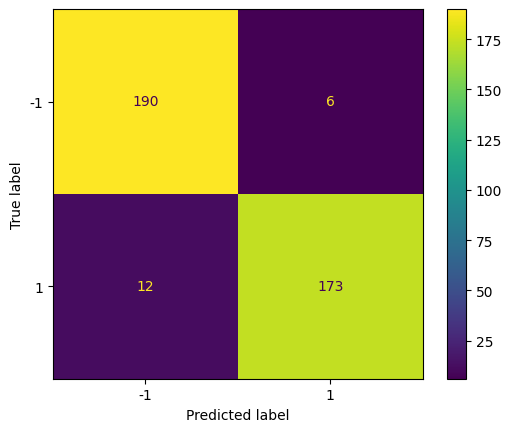

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test_5_3_pos_neg.astype(int), y_pred)

In [94]:
from sklearn.metrics import classification_report
report = classification_report(y_test_5_3_pos_neg.astype(int), y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       196
           1       0.97      0.94      0.95       185

    accuracy                           0.95       381
   macro avg       0.95      0.95      0.95       381
weighted avg       0.95      0.95      0.95       381



In [102]:
from sklearn.linear_model import Perceptron
model_1 = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=False, fit_intercept=True, penalty=None)
model_1.fit(X_train_5_3, y_train_5_3_pos_neg.astype(int))

Perceptron(eta0=1, max_iter=100, random_state=42, shuffle=False)

In [103]:
y_pred_1 = model_1.predict(X_test_5_3)

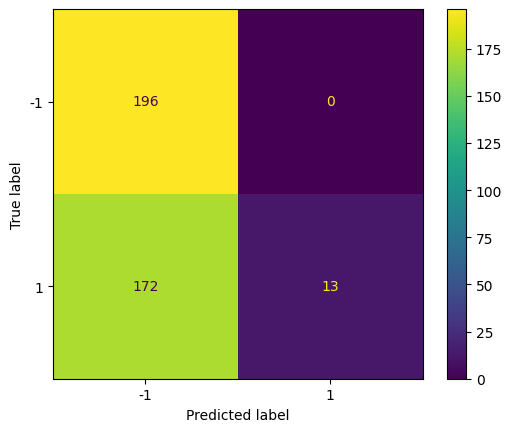

In [104]:
conf_matrix_1 = ConfusionMatrixDisplay.from_predictions(y_test_5_3_pos_neg.astype(int), y_pred_1)

In [105]:
report = classification_report(y_test_5_3_pos_neg.astype(int), y_pred_1)
print(report)

              precision    recall  f1-score   support

          -1       0.53      1.00      0.70       196
           1       1.00      0.07      0.13       185

    accuracy                           0.55       381
   macro avg       0.77      0.54      0.41       381
weighted avg       0.76      0.55      0.42       381

